credit:
sentiment anaylis code from (Gpreda)
https://github.com/gabrielpreda

In [1]:
# pip install transformers

In [2]:
# Data Viz Pkg

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
from transformers import pipeline
# import nltk
# nltk.download('movie_reviews')
# nltk.download('punkt')

import warnings
warnings.filterwarnings('ignore')

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [3]:
# Load Dataset
df_raw = pd.read_csv("subreddit-comments-dl\comments.csv")
df_raw

,subreddit,id,submission_id,body,created_utc,parent_id,permalink
0,bim,izlb3ly,zgc6ju,"TBH, the people at AutoDesk should be more tha...",1670626628,t3_zgc6ju,/r/bim/comments/zgc6ju/bim_collaborate_pro_wor...
1,bim,j0cd6i1,zgc6ju,I believe all it does is give you access to ut...,1671123421,t3_zgc6ju,/r/bim/comments/zgc6ju/bim_collaborate_pro_wor...
2,bim,izpqltg,zgc6ju,These are two very likely possibilities... Thanks,1670712018,t1_izlb3ly,/r/bim/comments/zgc6ju/bim_collaborate_pro_wor...
3,bim,j0cp2ss,zgc6ju,That's what I thought. Considering we are plan...,1671127955,t1_j0cd6i1,/r/bim/comments/zgc6ju/bim_collaborate_pro_wor...
4,bim,izvp7yj,zftbgt,I don't know where you're located so it's hard...,1670820190,t3_zftbgt,/r/bim/comments/zftbgt/require_advice_from_exp...
...,...,...,...,...,...,...,...
128,bim,isfu96g,y3886g,"Hangers, Make sure everyone is modeling their ...",1665855375,t3_y3886g,/r/bim/comments/y3886g/coordinating_a_data_cen...
129,bim,is7ovbg,y3886g,Thank you for the input and that is good news.,1665698989,t1_is7nijo,/r/bim/comments/y3886g/coordinating_a_data_cen...
130,bim,is1yeuy,y29tke,Simply said. You become half architect half so...,1665599913,t3_y29tke,/r/bim/comments/y29tke/looking_for_advice_on_g...
131,bim,is22wxv,y29tke,If your interested in a job in Aus working wit...,1665601671,t3_y29tke,/r/bim/comments/y29tke/looking_for_advice_on_g...


In [4]:
#rename coloumn header

df_raw.rename({'body': 'overall_text'}, axis=1, inplace=True)
df_raw

,subreddit,id,submission_id,overall_text,created_utc,parent_id,permalink
0,bim,izlb3ly,zgc6ju,"TBH, the people at AutoDesk should be more tha...",1670626628,t3_zgc6ju,/r/bim/comments/zgc6ju/bim_collaborate_pro_wor...
1,bim,j0cd6i1,zgc6ju,I believe all it does is give you access to ut...,1671123421,t3_zgc6ju,/r/bim/comments/zgc6ju/bim_collaborate_pro_wor...
2,bim,izpqltg,zgc6ju,These are two very likely possibilities... Thanks,1670712018,t1_izlb3ly,/r/bim/comments/zgc6ju/bim_collaborate_pro_wor...
3,bim,j0cp2ss,zgc6ju,That's what I thought. Considering we are plan...,1671127955,t1_j0cd6i1,/r/bim/comments/zgc6ju/bim_collaborate_pro_wor...
4,bim,izvp7yj,zftbgt,I don't know where you're located so it's hard...,1670820190,t3_zftbgt,/r/bim/comments/zftbgt/require_advice_from_exp...
...,...,...,...,...,...,...,...
128,bim,isfu96g,y3886g,"Hangers, Make sure everyone is modeling their ...",1665855375,t3_y3886g,/r/bim/comments/y3886g/coordinating_a_data_cen...
129,bim,is7ovbg,y3886g,Thank you for the input and that is good news.,1665698989,t1_is7nijo,/r/bim/comments/y3886g/coordinating_a_data_cen...
130,bim,is1yeuy,y29tke,Simply said. You become half architect half so...,1665599913,t3_y29tke,/r/bim/comments/y29tke/looking_for_advice_on_g...
131,bim,is22wxv,y29tke,If your interested in a job in Aus working wit...,1665601671,t3_y29tke,/r/bim/comments/y29tke/looking_for_advice_on_g...


In [5]:
#dropping unecessary column

df = df_raw[['overall_text']]   # double brackets returns df 


In [6]:
# Preview
df.head()

,overall_text
0,"TBH, the people at AutoDesk should be more tha..."
1,I believe all it does is give you access to ut...
2,These are two very likely possibilities... Thanks
3,That's what I thought. Considering we are plan...
4,I don't know where you're located so it's hard...


#### Task
+ Text
    - Text Preprocessing
    - Sentiment Analysis
    - Keyword Extraction
    - Entity Extraction

In [7]:
# Check Columns
df.columns

Index(['overall_text'], dtype='object')

In [8]:
# Datatype
df.dtypes

overall_text    object
dtype: object

In [9]:
# Gives the frequency of each unique word in the data frame col (AT THE END OF SENTENCE)
df['overall_text'].unique()  

array(['TBH, the people at AutoDesk should be more than able to provide advantages, ROI, etc, if they have shown *"everything"* they have and you are still unable to see any important advantage, it could be two things:\\n\\n- There\'s none\\n- The people selling it to you don\'t have a clue about it, nor how you could benefit from it, they\'re just trying to upsell you.',
       'I believe all it does is give you access to utilize the Cloud-based model sharing within BIM360/ACC',
       'These are two very likely possibilities... Thanks',
       "That's what I thought. Considering we are planning to coordinate and share models between disciplines using ifc and we usually don't have more than one engineer working on a single model, I don't find the cloud based model sharing very useful.",
       "I don't know where you're located so it's hard to say if the potential is there where you live vs relocating. \\n\\nIs the pay low period, or low relative to other job offers? Is the job in the

#### Text Analysis of reddit posts

In [10]:
# pip install neattext

In [11]:
# Load Text Cleaning Package
import neattext.functions as nfx

In [12]:
# Methods/Attrib
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

### Sentiment Analysis

In [13]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer


In [14]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0.3:
        sentiment_label = 'Positive'
    elif sentiment_polarity < -0.02:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result

In [15]:
df['sentiment_results'] = df['overall_text'].apply(get_sentiment)

In [16]:
df['sentiment_results']

0      {'polarity': 0.225, 'subjectivity': 0.65625, '...
1      {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
2      {'polarity': 0.1, 'subjectivity': 0.6, 'sentim...
3      {'polarity': 0.14214285714285715, 'subjectivit...
4      {'polarity': 0.09382284382284382, 'subjectivit...
                             ...                        
128    {'polarity': 0.17222222222222222, 'subjectivit...
129    {'polarity': 0.7, 'subjectivity': 0.6000000000...
130    {'polarity': -0.1111111111111111, 'subjectivit...
131    {'polarity': 0.25, 'subjectivity': 0.5, 'senti...
132    {'polarity': -0.13181818181818183, 'subjectivi...
Name: sentiment_results, Length: 133, dtype: object

In [17]:
df

,overall_text,sentiment_results
0,"TBH, the people at AutoDesk should be more tha...","{'polarity': 0.225, 'subjectivity': 0.65625, '..."
1,I believe all it does is give you access to ut...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim..."
2,These are two very likely possibilities... Thanks,"{'polarity': 0.1, 'subjectivity': 0.6, 'sentim..."
3,That's what I thought. Considering we are plan...,"{'polarity': 0.14214285714285715, 'subjectivit..."
4,I don't know where you're located so it's hard...,"{'polarity': 0.09382284382284382, 'subjectivit..."
...,...,...
128,"Hangers, Make sure everyone is modeling their ...","{'polarity': 0.17222222222222222, 'subjectivit..."
129,Thank you for the input and that is good news.,"{'polarity': 0.7, 'subjectivity': 0.6000000000..."
130,Simply said. You become half architect half so...,"{'polarity': -0.1111111111111111, 'subjectivit..."
131,If your interested in a job in Aus working wit...,"{'polarity': 0.25, 'subjectivity': 0.5, 'senti..."


In [18]:
# pd.json_normalize(df['sentiment_results'].iloc[0])

In [19]:
df = df.join(pd.json_normalize(df['sentiment_results']))

In [20]:
df.head()

,overall_text,sentiment_results,polarity,subjectivity,sentiment
0,"TBH, the people at AutoDesk should be more tha...","{'polarity': 0.225, 'subjectivity': 0.65625, '...",0.225000,0.656250,Neutral
1,I believe all it does is give you access to ut...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
2,These are two very likely possibilities... Thanks,"{'polarity': 0.1, 'subjectivity': 0.6, 'sentim...",0.100000,0.600000,Neutral
3,That's what I thought. Considering we are plan...,"{'polarity': 0.14214285714285715, 'subjectivit...",0.142143,0.241071,Neutral
4,I don't know where you're located so it's hard...,"{'polarity': 0.09382284382284382, 'subjectivit...",0.093823,0.547436,Neutral


In [21]:
#for confusion matrix of sentiment analysis purposes
df.to_csv('confusion.csv')

In [22]:
#print(df['sentiment_results'].get('sentiment'))
print(df['sentiment_results'])

0      {'polarity': 0.225, 'subjectivity': 0.65625, '...
1      {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
2      {'polarity': 0.1, 'subjectivity': 0.6, 'sentim...
3      {'polarity': 0.14214285714285715, 'subjectivit...
4      {'polarity': 0.09382284382284382, 'subjectivit...
                             ...                        
128    {'polarity': 0.17222222222222222, 'subjectivit...
129    {'polarity': 0.7, 'subjectivity': 0.6000000000...
130    {'polarity': -0.1111111111111111, 'subjectivit...
131    {'polarity': 0.25, 'subjectivity': 0.5, 'senti...
132    {'polarity': -0.13181818181818183, 'subjectivi...
Name: sentiment_results, Length: 133, dtype: object


<Axes: xlabel='sentiment_results'>

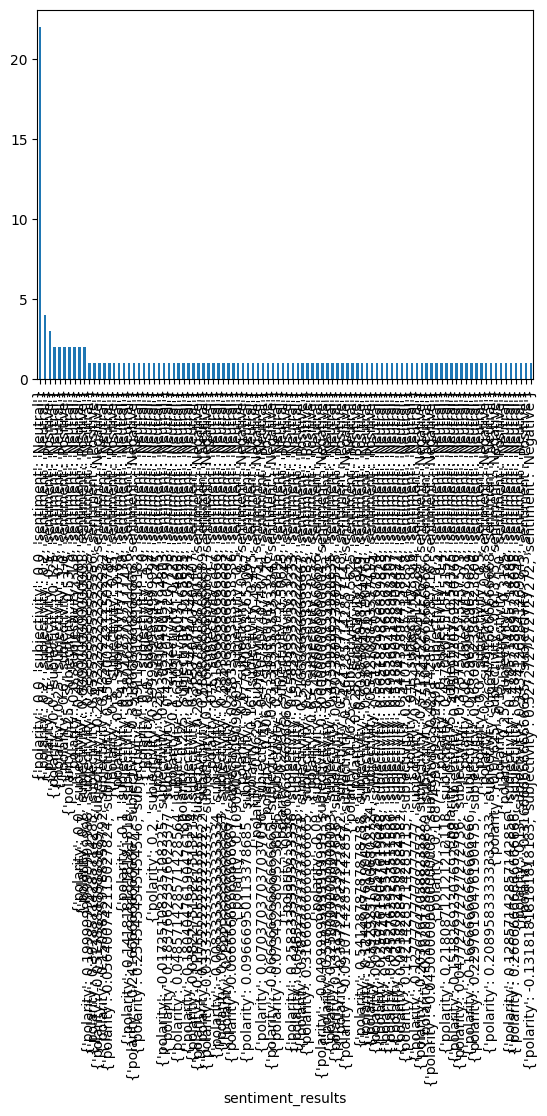

In [23]:
df['sentiment_results'].value_counts().plot(kind='bar')

<Axes: xlabel='sentiment', ylabel='count'>

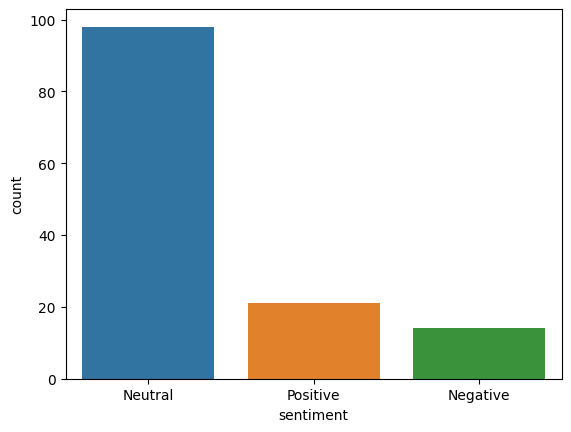

In [24]:
# Plot with seaborn
sns.countplot(x=df['sentiment'])

In [25]:
# ### Keyword Extraction
# + For Positive and Negative Sentiment
# + General

# positive negative neutral sentiments


In [26]:
# Tokenization

def splitting_lines(input_list):
    for line in positivelist:
    #     print(line)
        for token in line.split():
            print(token)

## Positives

In [27]:
positives = df[df['sentiment'] == 'Positive']['overall_text']
positives

6      Most of the people in BIM at the company I'm a...
12     We are a commercial mechanical contractor.  Ha...
13     Thank you so very much, excellent read.  Each ...
14                                    Very sound advice!
16                      Excellent, thanks for the reply!
22     That’s awesome, I would love to have the oppor...
25     Oh also, SketchUp is a fun tool too. If you wa...
29     The US. \n\nOver here Civil engineers use Civi...
39     Haven't caught up on BlenderBIM so this is int...
48     All the auto manufacturers do as far as I’m aw...
51     If you are talking about good quality visuals ...
64     Looks  very interesting, do you happen to know...
67     We've started using it on a project because th...
88     No I work for the GC/designer. The projects I ...
93     I believe the BIM process is important on jobs...
95     BIM in the post 2018. era is mostly nonsense, ...
101    Do not conflate "point cloud" with "Valuable D...
103                            

In [28]:
# Remove Stopwords and Convert to Tokens
positivelist = positives.apply(nfx.remove_stopwords).tolist()
positivelist 

["people BIM company I'm are/were journeymen. looking office job, shabby. staring computer screen many, hours.",
 'commercial mechanical contractor. 175 employees 4 BIM dept. \\n\\nFormer field employees best BIM techs/coordinators, want them. computer savvy, efficient easily learn Revit. \\n\\nI’ve Revit 8 years now. I’m field self-taught plumbing/HVAC design Revit. \\n\\nIt takes special person work. think box solve problems. highly recommend giving shot. self-teacher read code books. You’re responsible learning/development BIM.',
 'Thank much, excellent read. new post getting excited career change.',
 'sound advice!',
 'Excellent, thanks reply!',
 'That’s awesome, love opportunity sent abroad.\\nAnyways, 3 types knowledge. ones software/apps knowledge, ones trade knowledge experienced ones meet middle previous two. interested takes you.',
 'Oh also, SketchUp fun tool too. want learn use that, best way opinion practice modeling you’re familiar with— like you’re house.',
 'US. \\n\\nO

In [29]:
splitting_lines(positivelist)

people
BIM
company
I'm
are/were
journeymen.
looking
office
job,
shabby.
staring
computer
screen
many,
hours.
commercial
mechanical
contractor.
175
employees
4
BIM
dept.
\n\nFormer
field
employees
best
BIM
techs/coordinators,
want
them.
computer
savvy,
efficient
easily
learn
Revit.
\n\nI’ve
Revit
8
years
now.
I’m
field
self-taught
plumbing/HVAC
design
Revit.
\n\nIt
takes
special
person
work.
think
box
solve
problems.
highly
recommend
giving
shot.
self-teacher
read
code
books.
You’re
responsible
learning/development
BIM.
Thank
much,
excellent
read.
new
post
getting
excited
career
change.
sound
advice!
Excellent,
thanks
reply!
That’s
awesome,
love
opportunity
sent
abroad.\nAnyways,
3
types
knowledge.
ones
software/apps
knowledge,
ones
trade
knowledge
experienced
ones
meet
middle
previous
two.
interested
takes
you.
Oh
also,
SketchUp
fun
tool
too.
want
learn
use
that,
best
way
opinion
practice
modeling
you’re
familiar
with—
like
you’re
house.
US.
\n\nOver
Civil
engineers
use
Civil
3D,
basic

In [30]:
pos_tokens = [token for line in positivelist  for token in line.split()]
pos_tokens


['people',
 'BIM',
 'company',
 "I'm",
 'are/were',
 'journeymen.',
 'looking',
 'office',
 'job,',
 'shabby.',
 'staring',
 'computer',
 'screen',
 'many,',
 'hours.',
 'commercial',
 'mechanical',
 'contractor.',
 '175',
 'employees',
 '4',
 'BIM',
 'dept.',
 '\\n\\nFormer',
 'field',
 'employees',
 'best',
 'BIM',
 'techs/coordinators,',
 'want',
 'them.',
 'computer',
 'savvy,',
 'efficient',
 'easily',
 'learn',
 'Revit.',
 '\\n\\nI’ve',
 'Revit',
 '8',
 'years',
 'now.',
 'I’m',
 'field',
 'self-taught',
 'plumbing/HVAC',
 'design',
 'Revit.',
 '\\n\\nIt',
 'takes',
 'special',
 'person',
 'work.',
 'think',
 'box',
 'solve',
 'problems.',
 'highly',
 'recommend',
 'giving',
 'shot.',
 'self-teacher',
 'read',
 'code',
 'books.',
 'You’re',
 'responsible',
 'learning/development',
 'BIM.',
 'Thank',
 'much,',
 'excellent',
 'read.',
 'new',
 'post',
 'getting',
 'excited',
 'career',
 'change.',
 'sound',
 'advice!',
 'Excellent,',
 'thanks',
 'reply!',
 'That’s',
 'awesome,',
 '

In [32]:
negatives = df[df['sentiment'] == 'Negative']['overall_text']
negativelist = negatives.apply(nfx.remove_stopwords).tolist()
neg_tokens = [token for line in negativelist  for token in line.split()]
neg_tokens

['long',
 'grid',
 'brace,',
 'odds',
 'steel',
 'stuff.',
 'Otherwise,',
 "there's",
 'usually',
 'max',
 'limit',
 'offset',
 'spacing',
 'steel',
 'change',
 'needs',
 'penetrate',
 'up/down',
 'miss',
 'steel.',
 'Depth',
 'steel',
 'horizontal',
 'conflict',
 'driven',
 'span,',
 'kinda',
 'locks',
 'depths',
 'steel.',
 'maybe',
 'squeeze',
 'couple',
 'inches',
 'shorter',
 'solution.',
 '\\n\\nConc,',
 'conc',
 'pan',
 'system',
 'determines',
 'placement',
 'bit',
 'pain',
 'wiggle',
 'conc',
 'pan',
 'forms.',
 'Tiltwalls,',
 'crazy',
 'rebar',
 'embeds',
 'us.',
 '\\n\\nWood,',
 'imagine',
 'kinda',
 'like',
 'steel.',
 "I've",
 '5',
 'story',
 'metal',
 'base/wood',
 'project',
 'apartment',
 'complex',
 'issues',
 'mep.',
 'world',
 'I’m',
 'Civil',
 'Engineering',
 'discipline',
 'isn’t',
 'I’d',
 'BIM-related',
 'discipline.',
 'civil',
 'engineering',
 'work',
 'world',
 'coordinates,',
 'I’m',
 'road',
 'designer',
 'Australia',
 'work',
 'MGA56',
 'surveyors',
 'work'

In [33]:
neutrals = df[df['sentiment'] == 'Neutral']['overall_text']
neutrallist = neutrals.apply(nfx.remove_stopwords).tolist()
neut_tokens = [token for line in neutrallist  for token in line.split()]
neut_tokens

['TBH,',
 'people',
 'AutoDesk',
 'able',
 'provide',
 'advantages,',
 'ROI,',
 'etc,',
 'shown',
 '*"everything"*',
 'unable',
 'important',
 'advantage,',
 'things:\\n\\n-',
 "There's",
 'none\\n-',
 'people',
 'selling',
 'clue',
 'it,',
 'benefit',
 'it,',
 "they're",
 'trying',
 'upsell',
 'you.',
 'believe',
 'access',
 'utilize',
 'Cloud-based',
 'model',
 'sharing',
 'BIM360/ACC',
 'likely',
 'possibilities...',
 'Thanks',
 "That's",
 'thought.',
 'Considering',
 'planning',
 'coordinate',
 'share',
 'models',
 'disciplines',
 'ifc',
 'usually',
 'engineer',
 'working',
 'single',
 'model,',
 'find',
 'cloud',
 'based',
 'model',
 'sharing',
 'useful.',
 'know',
 'located',
 'hard',
 'potential',
 'live',
 'vs',
 'relocating.',
 '\\n\\nIs',
 'pay',
 'low',
 'period,',
 'low',
 'relative',
 'job',
 'offers?',
 'job',
 'design',
 'field',
 'construction',
 'field?',
 'opportunities',
 'advancement?',
 'job',
 'duties/responsibilities?',
 '\\n\\nThere',
 'information',
 'post',
 '

In [34]:
# Get Most Commonest Keywords
from collections import Counter

In [52]:
def get_tokens(docx,num=30):
    token_words = Counter(docx)
    most_common = token_words.most_common(num)
    output= dict(most_common)
    return output

In [53]:
get_tokens(pos_tokens)

{'BIM': 10,
 'design': 4,
 'use': 4,
 'lot': 4,
 'best': 3,
 'Revit': 3,
 'think': 3,
 'Thank': 3,
 'ones': 3,
 'Civil': 3,
 'model': 3,
 'cloud': 3,
 'projects': 3,
 'existing': 3,
 'conditions': 3,
 'people': 2,
 'company': 2,
 "I'm": 2,
 'computer': 2,
 'employees': 2,
 'field': 2,
 'want': 2,
 'learn': 2,
 'Revit.': 2,
 'I’m': 2,
 'takes': 2,
 'work.': 2,
 'giving': 2,
 'BIM.': 2,
 'post': 2}

In [54]:
get_tokens(neg_tokens)

{'survey': 7,
 'project': 6,
 'coordinates': 6,
 'set': 6,
 'I’m': 5,
 'base': 5,
 'point': 5,
 'know': 5,
 'work': 4,
 'road': 4,
 'it’s': 4,
 'use': 4,
 'fucking': 4,
 'steel': 3,
 'steel.': 3,
 'world': 3,
 'designer': 3,
 'design': 3,
 'big': 3,
 'shared': 3,
 'shit': 3,
 '/': 3,
 'coordination': 3,
 'software': 3,
 'grid': 2,
 'stuff.': 2,
 'usually': 2,
 'kinda': 2,
 'couple': 2,
 'conc': 2}

In [55]:
get_tokens(neut_tokens)

{'BIM': 65,
 'work': 32,
 'like': 24,
 'Revit': 23,
 'use': 22,
 'time': 21,
 'software': 18,
 'model': 17,
 'know': 16,
 'job': 16,
 'project': 16,
 'clash': 16,
 'field': 15,
 'need': 15,
 'experience': 15,
 'working': 14,
 'want': 13,
 '--': 13,
 'think': 12,
 'MEP': 12,
 'way': 11,
 'good': 11,
 'people': 10,
 'answer': 10,
 'new': 10,
 'coordination': 10,
 'engineering': 10,
 'Autodesk': 10,
 'file': 10,
 'design': 9}

In [56]:
most_common_pos_words = get_tokens(pos_tokens)
most_common_neg_words = get_tokens(neg_tokens)
most_common_neut_words = get_tokens(neut_tokens)

In [58]:
type(most_common_pos_words)


dict

In [59]:
# Plot with seaborn
neg_df = pd.DataFrame(most_common_neg_words.items(),columns=['words','scores'])

In [60]:
neg_df

,words,scores
0,survey,7
1,project,6
2,coordinates,6
3,set,6
4,I’m,5
5,base,5
6,point,5
7,know,5
8,work,4
9,road,4


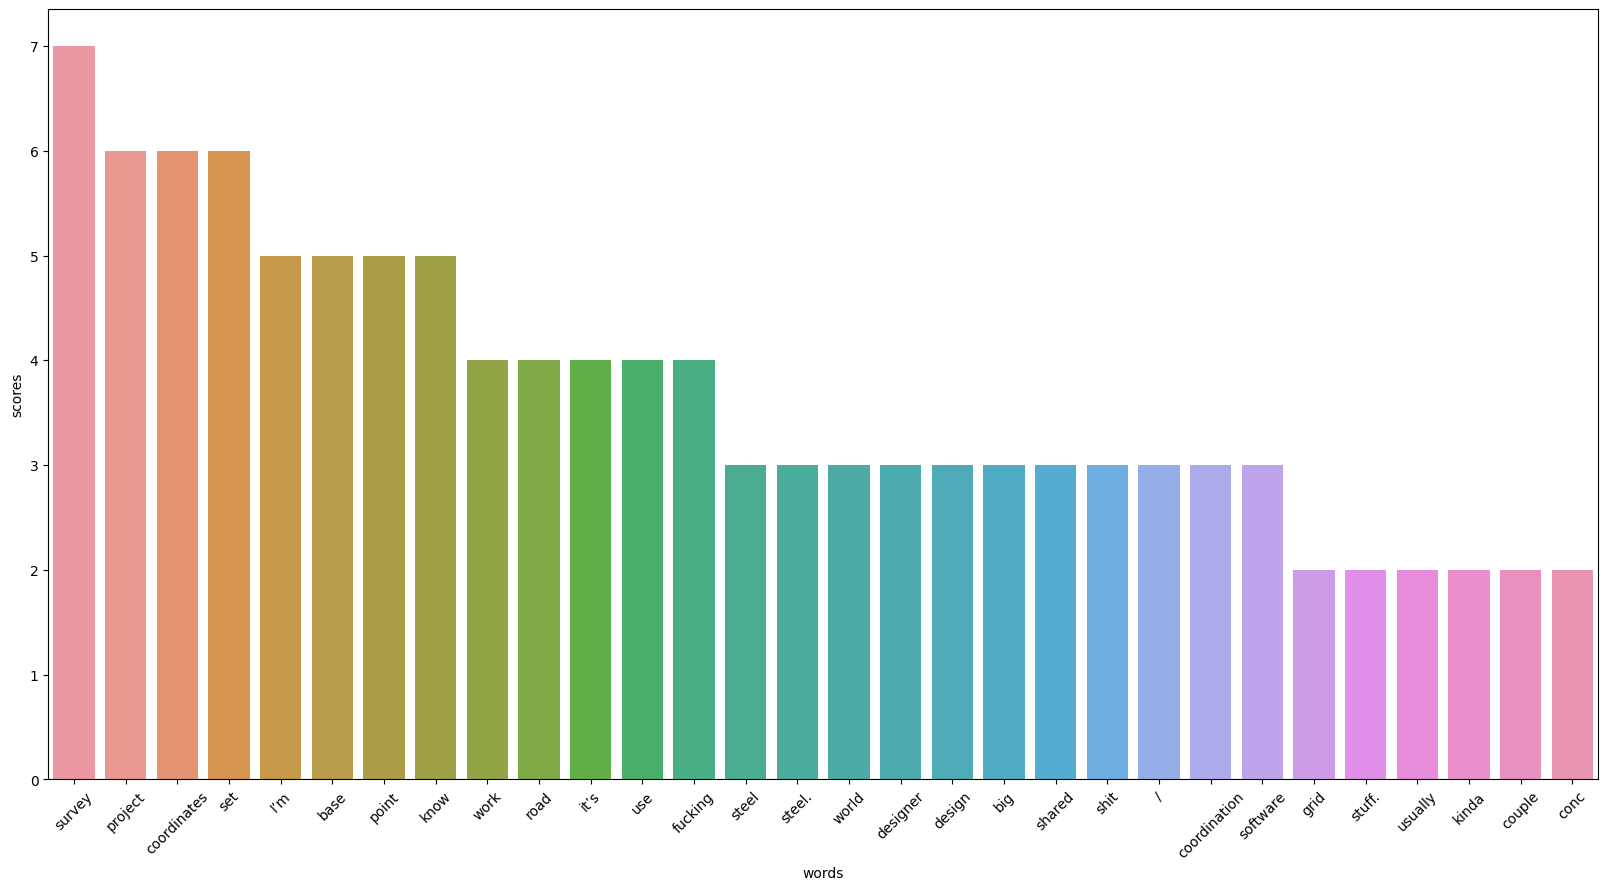

In [61]:
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neg_df)
plt.xticks(rotation=45)
plt.show()

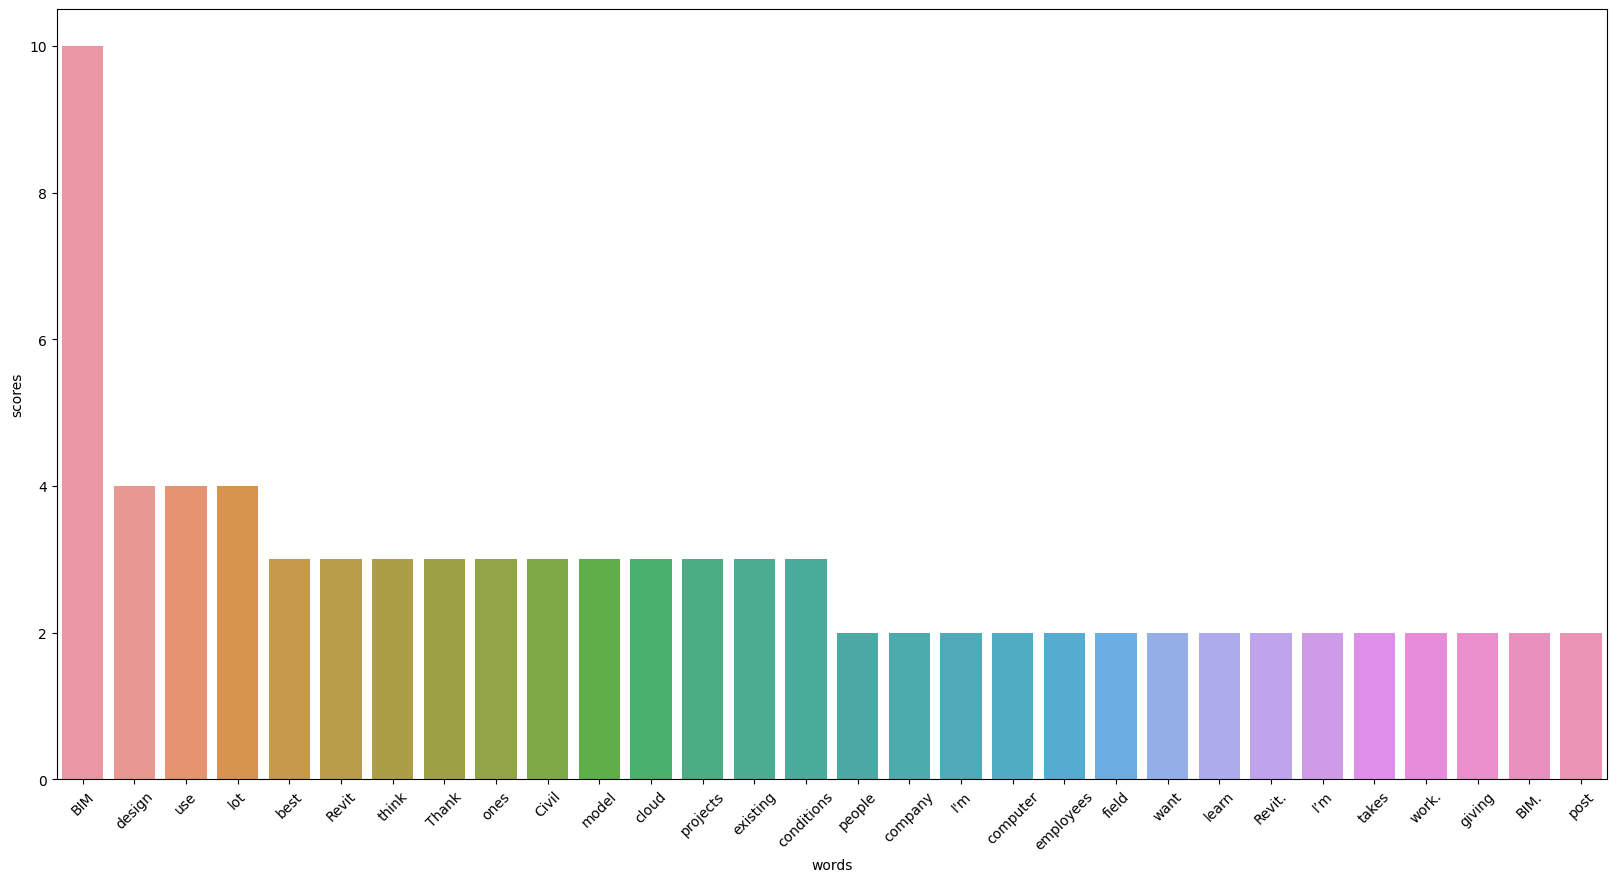

In [62]:
# Plot with seaborn
pos_df = pd.DataFrame(most_common_pos_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=pos_df)
plt.xticks(rotation=45)
plt.show()


In [63]:
neut_df = pd.DataFrame(most_common_neut_words.items(),columns=['words','scores'])
neut_df

,words,scores
0,BIM,65
1,work,32
2,like,24
3,Revit,23
4,use,22
5,time,21
6,software,18
7,model,17
8,know,16
9,job,16


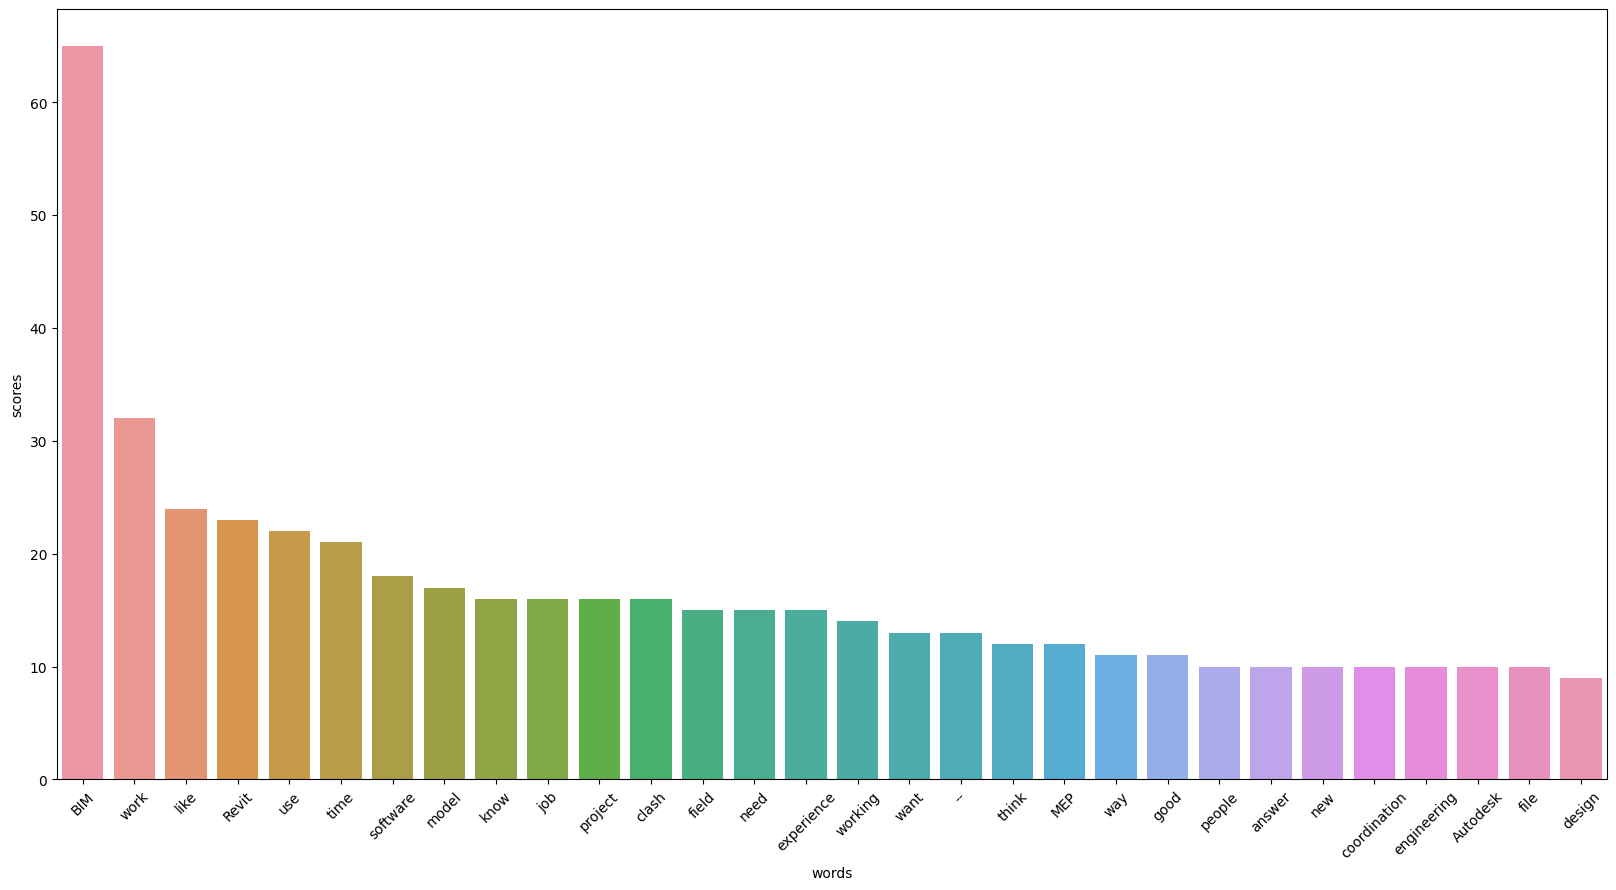

In [64]:
# Plot with seaborn
neut_df = pd.DataFrame(most_common_neut_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neut_df)
plt.xticks(rotation=45)
plt.show()


# Sustainability Zero shot classification (BERT ZERO-SHOT ROUND 2)

In [65]:
df

,overall_text,sentiment_results,polarity,subjectivity,sentiment
0,"TBH, the people at AutoDesk should be more tha...","{'polarity': 0.225, 'subjectivity': 0.65625, '...",0.225000,0.656250,Neutral
1,I believe all it does is give you access to ut...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
2,These are two very likely possibilities... Thanks,"{'polarity': 0.1, 'subjectivity': 0.6, 'sentim...",0.100000,0.600000,Neutral
3,That's what I thought. Considering we are plan...,"{'polarity': 0.14214285714285715, 'subjectivit...",0.142143,0.241071,Neutral
4,I don't know where you're located so it's hard...,"{'polarity': 0.09382284382284382, 'subjectivit...",0.093823,0.547436,Neutral
...,...,...,...,...,...
128,"Hangers, Make sure everyone is modeling their ...","{'polarity': 0.17222222222222222, 'subjectivit...",0.172222,0.588889,Neutral
129,Thank you for the input and that is good news.,"{'polarity': 0.7, 'subjectivity': 0.6000000000...",0.700000,0.600000,Positive
130,Simply said. You become half architect half so...,"{'polarity': -0.1111111111111111, 'subjectivit...",-0.111111,0.230159,Negative
131,If your interested in a job in Aus working wit...,"{'polarity': 0.25, 'subjectivity': 0.5, 'senti...",0.250000,0.500000,Neutral


Negative Dataframe

In [66]:
neg_df = pd.DataFrame(columns=[ 'word', 'text', 'polarity'])

In [69]:
neg_tokens

['long',
 'grid',
 'brace,',
 'odds',
 'steel',
 'stuff.',
 'Otherwise,',
 "there's",
 'usually',
 'max',
 'limit',
 'offset',
 'spacing',
 'steel',
 'change',
 'needs',
 'penetrate',
 'up/down',
 'miss',
 'steel.',
 'Depth',
 'steel',
 'horizontal',
 'conflict',
 'driven',
 'span,',
 'kinda',
 'locks',
 'depths',
 'steel.',
 'maybe',
 'squeeze',
 'couple',
 'inches',
 'shorter',
 'solution.',
 '\\n\\nConc,',
 'conc',
 'pan',
 'system',
 'determines',
 'placement',
 'bit',
 'pain',
 'wiggle',
 'conc',
 'pan',
 'forms.',
 'Tiltwalls,',
 'crazy',
 'rebar',
 'embeds',
 'us.',
 '\\n\\nWood,',
 'imagine',
 'kinda',
 'like',
 'steel.',
 "I've",
 '5',
 'story',
 'metal',
 'base/wood',
 'project',
 'apartment',
 'complex',
 'issues',
 'mep.',
 'world',
 'I’m',
 'Civil',
 'Engineering',
 'discipline',
 'isn’t',
 'I’d',
 'BIM-related',
 'discipline.',
 'civil',
 'engineering',
 'work',
 'world',
 'coordinates,',
 'I’m',
 'road',
 'designer',
 'Australia',
 'work',
 'MGA56',
 'surveyors',
 'work'

In [77]:
df["overall_text"]

0      TBH, the people at AutoDesk should be more tha...
1      I believe all it does is give you access to ut...
2      These are two very likely possibilities... Thanks
3      That's what I thought. Considering we are plan...
4      I don't know where you're located so it's hard...
                             ...                        
128    Hangers, Make sure everyone is modeling their ...
129       Thank you for the input and that is good news.
130    Simply said. You become half architect half so...
131    If your interested in a job in Aus working wit...
132    I’m keen, I’m a 12 road designer / utilities m...
Name: overall_text, Length: 133, dtype: object

In [88]:
neg_tokens

['long',
 'grid',
 'brace,',
 'odds',
 'steel',
 'stuff.',
 'Otherwise,',
 "there's",
 'usually',
 'max',
 'limit',
 'offset',
 'spacing',
 'steel',
 'change',
 'needs',
 'penetrate',
 'up/down',
 'miss',
 'steel.',
 'Depth',
 'steel',
 'horizontal',
 'conflict',
 'driven',
 'span,',
 'kinda',
 'locks',
 'depths',
 'steel.',
 'maybe',
 'squeeze',
 'couple',
 'inches',
 'shorter',
 'solution.',
 '\\n\\nConc,',
 'conc',
 'pan',
 'system',
 'determines',
 'placement',
 'bit',
 'pain',
 'wiggle',
 'conc',
 'pan',
 'forms.',
 'Tiltwalls,',
 'crazy',
 'rebar',
 'embeds',
 'us.',
 '\\n\\nWood,',
 'imagine',
 'kinda',
 'like',
 'steel.',
 "I've",
 '5',
 'story',
 'metal',
 'base/wood',
 'project',
 'apartment',
 'complex',
 'issues',
 'mep.',
 'world',
 'I’m',
 'Civil',
 'Engineering',
 'discipline',
 'isn’t',
 'I’d',
 'BIM-related',
 'discipline.',
 'civil',
 'engineering',
 'work',
 'world',
 'coordinates,',
 'I’m',
 'road',
 'designer',
 'Australia',
 'work',
 'MGA56',
 'surveyors',
 'work'

In [89]:
for text in df['overall_text']:
    print(text)
    

TBH, the people at AutoDesk should be more than able to provide advantages, ROI, etc, if they have shown *"everything"* they have and you are still unable to see any important advantage, it could be two things:\n\n- There's none\n- The people selling it to you don't have a clue about it, nor how you could benefit from it, they're just trying to upsell you.
I believe all it does is give you access to utilize the Cloud-based model sharing within BIM360/ACC
These are two very likely possibilities... Thanks
That's what I thought. Considering we are planning to coordinate and share models between disciplines using ifc and we usually don't have more than one engineer working on a single model, I don't find the cloud based model sharing very useful.
I don't know where you're located so it's hard to say if the potential is there where you live vs relocating. \n\nIs the pay low period, or low relative to other job offers? Is the job in the design field or the construction field? What opportunit

In [90]:
##ITERATING NEGATIVE SENTIMENT
word_sentiment = {}


for word in neg_tokens:
    word_sentiment[word] = [] 
    i=0
    for text in df['overall_text']:
        if text in word and df['sentiment'][i] == 'Negative':
            word_polarity = df['sentiment_results'].iloc[i]['polarity']
            word_sentiment[words].append(df['sentiment_results'].iloc[i]['polarity'])

            neg_df = neg_df.append({'word' : word, 'text' : text, 'polarity' : word_polarity},ignore_index = True)
        i += 1

In [91]:
neg_df

,word,text,polarity


In [50]:
#removing duplicates

neg_df = neg_df.drop_duplicates(subset=['text'])

neg_df

,behaviour,function,structure,sustainability,word,text,polarity


In [ ]:
#reset index

neg_df = neg_df.reset_index()

neg_df = neg_df.drop(columns = ['index'])

neg_df

In [ ]:
#neg_df.to_csv(r'/Users/raymondharrison/Desktop/neg_df.csv')

In [ ]:
    # for word in word_sentiment.keys():
    #     print (word, word_sentiment[word])
    #     sum = 0
    #     for i in range(len(word_sentiment[word])):
    #         sum = sum + word_sentiment[word][i]
    #     print(sum/len(word_sentiment[word]))
    #     if len(word_sentiment[word]) >= 10: #ONLY PRINT IF THERES MOER THAN 10 DATA
    #         ls = []
    #         for i in range(len(word_sentiment[word])):
    #             ls.append(i)
    #         plt.style.use("seaborn") 
    #         plt.title(word)
    #         plt.ylim(-1, 1)
    #         plt.scatter( x= ls,y= word_sentiment[word] )
    #         plt.show() 
            

In [ ]:
#from sustainable_candidates import sus_candidates ##HOW TO FIX AH LOL

In [ ]:
#BERT ZERO SHOT 2 (SUSTAINABILITY)

neg_text = []

for text in neg_df['text']:
    neg_text.append(text)

candidates = ['sustainability', 'carbon polarity', 'water', 'eco friendly', 'renewable', 'environment', 'recycling', 'zero waste', 'electricity', 'cost', 'others']
classifier = pipeline("zero-shot-classification")

results = classifier(neg_text, candidate_labels=candidates)

for i in range(len(results)):
    print(results[i]['sequence'])
    max_value = max(results[i]['scores'])                     # identify the max value in the entire list
    max_index = results[i]['scores'].index(max_value)         # identify the list index with max value
    print(results[i]['labels'][max_index])
    print("\n")
    
temp_df = pd.DataFrame(results)
temp_df

In [ ]:
len(temp_df)

In [ ]:
for i in range(len(temp_df)):
  neg_df['sustainability'][i] = temp_df['labels'][i][0]
  
neg_df

Positive Dataframe

In [ ]:
pos_df = pd.DataFrame(columns=['behaviour', 'function', 'structure', 'sustainability', 'word', 'text', 'polarity'])

pos_df

In [ ]:
##ITERATING POSITIVE SENTIMENT

word_sentiment = {}

for words in pos_tokens:
    word_sentiment[words] = []
    i=0
    for text in df['overall_text']:
        if words in text and df['sentiment'][i] == 'Positive':
            word_polarity = df['sentiment_results'].iloc[i]['polarity']
            word_sentiment[words].append(df['sentiment_results'].iloc[i]['polarity'])

            pos_df = pos_df.append({'word' : words, 'text' : text, 'polarity' : word_polarity},ignore_index = True)
        i += 1

In [ ]:
#removing duplicates

pos_df = pos_df.drop_duplicates(subset=['text'])
pos_df.size
len(pos_df)

In [ ]:
#pos_df.to_csv(r'/Users/raymondharrison/Desktop/pos_df.csv')

In [ ]:
    # for word in word_sentiment.keys():
    #     print (word, word_sentiment[word])
    #     if len(word_sentiment[word]) >= 10:
    #         ls = []
    #         for i in range(len(word_sentiment[word])):
    #             ls.append(i) 
    #         plt.title(word)
    #         plt.ylim(-1, 1)
    #         plt.scatter( x= ls,y= word_sentiment[word] )
    #         plt.show() 

In [ ]:
#reset index

pos_df = pos_df.reset_index()

pos_df = pos_df.drop(columns = ['index'])

pos_df

In [ ]:
#BERT ZERO SHOT 2 (SUSTAINABILITY)

pos_text = []

for text in pos_df['text']:
    pos_text.append(text)

candidates = ['sustainability', 'carbon footprint', 'water', 'eco friendly', 'renewable', 'environment', 'recycling', 'zero waste', 'electricity', 'cost', 'others']
classifier = pipeline("zero-shot-classification")

results = classifier(pos_text, candidate_labels=candidates)

for i in range(len(results)):
    print(results[i]['sequence'])
    max_value = max(results[i]['scores'])                     # identify the max value in the entire list
    max_index = results[i]['scores'].index(max_value)         # identify the list index with max value
    print(results[i]['labels'][max_index])
    print("\n")
    
temp_df = pd.DataFrame(results)
temp_df

In [ ]:
for i in range(len(temp_df)):
  pos_df['sustainability'][i] = temp_df['labels'][i][0]
  
pos_df

# Behaviour, Function and Stuctural Zero shot classification (BERT ZERO-SHOT ROUND 3)


Negative Dataframe

In [ ]:
#candidates from research on MSR website and user manual

behaviour = ['hygiene', 'taste', 'smell', 'flow rate', 'life span', 'pore size', 'cartridge life', 'durability', 'others']
function = ['portable', 'remove bacteria', 'remove germs', 'remove viruses', 'remove impurities', 'remove sediment', 'remove dirt', 'remove bad taste', 'remove bad smell', 'remove water hardness', 'self-cleaning', 'others']
structure = ['piston', 'pump', 'filter', 'pressure relief valve', 'inlet hose', 'dirty water outlet hose', 'dual hose', 'nfl', 'inlet barb', 'dirty water outlet barb', 'pump head', 'pump housing', 'prefilter', 'water port', 'filter cartridge', 'filter base', 'side cover', 'cover', 'container', 'tank', 'tubing', 'seal', 'O-Ring', 'weight', 'dimensions', 'others']


In [ ]:
#BERT ZERO SHOT 3 (BEHAVIOUR)

candidates = behaviour
classifier = pipeline("zero-shot-classification")

results = classifier(neg_text, candidate_labels=candidates)

for i in range(len(results)):
    print(results[i]['sequence'])
    max_value = max(results[i]['scores'])                     # identify the max value in the entire list
    max_index = results[i]['scores'].index(max_value)         # identify the list index with max value
    print(results[i]['labels'][max_index])
    print("\n")
    
temp_df = pd.DataFrame(results)
temp_df

In [ ]:
for i in range(len(temp_df)):
  neg_df['behaviour'][i] = temp_df['labels'][i][0]
  
neg_df

In [ ]:
#BERT ZERO SHOT 3 (FUNCTION)

candidates = function
classifier = pipeline("zero-shot-classification")

results = classifier(neg_text, candidate_labels=candidates)

for i in range(len(results)):
    print(results[i]['sequence'])
    max_value = max(results[i]['scores'])                     # identify the max value in the entire list
    max_index = results[i]['scores'].index(max_value)         # identify the list index with max value
    print(results[i]['labels'][max_index])
    print("\n")
    
temp_df = pd.DataFrame(results)
temp_df

In [ ]:
for i in range(len(temp_df)):
  neg_df['function'][i] = temp_df['labels'][i][0]
  
neg_df

In [ ]:
#BERT ZERO SHOT 3 (STRUCTURE)

candidates = structure
classifier = pipeline("zero-shot-classification")

results = classifier(neg_text, candidate_labels=candidates)

for i in range(len(results)):
    print(results[i]['sequence'])
    max_value = max(results[i]['scores'])                     # identify the max value in the entire list
    max_index = results[i]['scores'].index(max_value)         # identify the list index with max value
    print(results[i]['labels'][max_index])
    print("\n")
    
temp_df = pd.DataFrame(results)
temp_df

In [ ]:
for i in range(len(temp_df)):
  neg_df['structure'][i] = temp_df['labels'][i][0]
  
neg_df

In [ ]:
neg_df.to_csv('neg_df.csv')

Posotive Dataframe

In [ ]:
#BERT ZERO SHOT 3 (BEHAVIOUR)

candidates = behaviour
classifier = pipeline("zero-shot-classification")

results = classifier(pos_text, candidate_labels=candidates)

for i in range(len(results)):
    print(results[i]['sequence'])
    max_value = max(results[i]['scores'])                     # identify the max value in the entire list
    max_index = results[i]['scores'].index(max_value)         # identify the list index with max value
    print(results[i]['labels'][max_index])
    print("\n")
    
temp_df = pd.DataFrame(results)
temp_df

In [ ]:
for i in range(len(temp_df)):
  pos_df['behaviour'][i] = temp_df['labels'][i][0]
  
pos_df

In [ ]:
pos_text = []

for text in pos_df['text']:
    pos_text.append(text)

In [ ]:
#BERT ZERO SHOT 3 (FUNCTION)

candidates = function
classifier = pipeline("zero-shot-classification")

results = classifier(pos_text, candidate_labels=candidates)

for i in range(len(results)):
    print(results[i]['sequence'])
    max_value = max(results[i]['scores'])                     # identify the max value in the entire list
    max_index = results[i]['scores'].index(max_value)         # identify the list index with max value
    print(results[i]['labels'][max_index])
    print("\n")
    
temp_df = pd.DataFrame(results)
temp_df

In [ ]:
for i in range(len(temp_df)):
  pos_df['function'][i] = temp_df['labels'][i][0]
  
pos_df

In [ ]:
#BERT ZERO SHOT 3 (STRUCTURE)

candidates = structure
classifier = pipeline("zero-shot-classification")

results = classifier(pos_text, candidate_labels=candidates)

for i in range(len(results)):
    print(results[i]['sequence'])
    max_value = max(results[i]['scores'])                     # identify the max value in the entire list
    max_index = results[i]['scores'].index(max_value)         # identify the list index with max value
    print(results[i]['labels'][max_index])
    print("\n")
    
temp_df = pd.DataFrame(results)
temp_df

In [ ]:
for i in range(len(temp_df)):
  pos_df['structure'][i] = temp_df['labels'][i][0]
  
pos_df

In [ ]:
#the 'word' data is only useful for our wordcloud to be generated below, and is not really relevant for our csv output
#Hence, we remove the 'word' from the dataframe

neg_df = neg_df.drop(['word'], axis=1)
pos_df = pos_df.drop(['word'], axis=1)

In [ ]:
neg_df.to_csv('youtube_neg_df.csv')
pos_df.to_csv('youtube_pos_df.csv')

In [ ]:
neg_df.to_csv('/content/drive/My Drive/reddit_neg_df.csv', encoding='utf-8', index=False)

In [ ]:
pos_df.to_csv('/content/drive/My Drive/reddit_pos_df.csv', encoding='utf-8', index=False)

# Wordcloud

In [ ]:
### Word Cloud
from wordcloud import WordCloud

In [ ]:
def plot_wordcloud(docx):
    plt.figure(figsize=(20,10))
    mywordcloud = WordCloud().generate(docx)
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [ ]:
pos_docx = ' '.join(pos_tokens)
neg_docx = ' '.join(neg_tokens)
neu_docx = ' '.join(neut_tokens)

In [ ]:
plot_wordcloud(pos_docx)

In [ ]:
plot_wordcloud(neg_docx)

In [ ]:
plot_wordcloud(neu_docx)

In [ ]:
plot_wordcloud(pos_docx)